# Importar librerias

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

from scipy.stats import chi2_contingency
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, Dense, AvgPool2D, MaxPool2D, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.resnet import ResNet50

from sklearn.exceptions import DataConversionWarning
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score, make_scorer
from sklearn.linear_model import LogisticRegression
import xgboost as xgb
from sklearn.neighbors import KNeighborsClassifier
from sklearn.utils import resample
from sklearn.model_selection import train_test_split, GridSearchCV

# Cargar datos

In [ ]:
contract_df = pd.read_csv('/datasets/final_provider/contract.csv')
internet_df = pd.read_csv('/datasets/final_provider/internet.csv')
personal_df = pd.read_csv('/datasets/final_provider/personal.csv')
phone_df = pd.read_csv('/datasets/final_provider/phone.csv')

# Contract
Informacion del contrato

In [ ]:
print(contract_df.info())
print(f'Contract shape = {contract_df.shape}')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   BeginDate         7043 non-null   object 
 2   EndDate           7043 non-null   object 
 3   Type              7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
dtypes: float64(1), object(7)
memory usage: 440.3+ KB
None
Contract shape = (7043, 8)


In [ ]:
contract_df.head()

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,29.85
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,1889.5
2,3668-QPYBK,2019-10-01,2019-12-01 00:00:00,Month-to-month,Yes,Mailed check,53.85,108.15
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1840.75
4,9237-HQITU,2019-09-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,70.70,151.65


In [ ]:
contract_df['BeginDate'] = pd.to_datetime(contract_df['BeginDate'])
contract_df['Churn'] = contract_df['EndDate'].apply(lambda x: 1 if x != 'No' else 0)

In [ ]:
contract_df['EndDate'] = contract_df['EndDate'].apply(lambda x: pd.to_datetime(x) if x != 'No' else x)

# Internet
Informacion sobre los servicios de internet

In [ ]:
print(internet_df.info())
print(f'Internet shape = {internet_df.shape}')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5517 entries, 0 to 5516
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customerID        5517 non-null   object
 1   InternetService   5517 non-null   object
 2   OnlineSecurity    5517 non-null   object
 3   OnlineBackup      5517 non-null   object
 4   DeviceProtection  5517 non-null   object
 5   TechSupport       5517 non-null   object
 6   StreamingTV       5517 non-null   object
 7   StreamingMovies   5517 non-null   object
dtypes: object(8)
memory usage: 344.9+ KB
None
Internet shape = (5517, 8)


In [ ]:
internet_df.head()

,customerID,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,Fiber optic,No,No,No,No,No,No


# Personal
Datos personales del cliente

In [ ]:
print(personal_df.info())
print(f'Personal shape = {personal_df.shape}')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     7043 non-null   object
 1   gender         7043 non-null   object
 2   SeniorCitizen  7043 non-null   int64 
 3   Partner        7043 non-null   object
 4   Dependents     7043 non-null   object
dtypes: int64(1), object(4)
memory usage: 275.2+ KB
None
Personal shape = (7043, 5)


In [ ]:
personal_df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No
3,7795-CFOCW,Male,0,No,No
4,9237-HQITU,Female,0,No,No


# Phone
Informacion sobre los servicios telefonicos

In [ ]:
print(phone_df.info())
print(f'Contract shape = {phone_df.shape}')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6361 entries, 0 to 6360
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     6361 non-null   object
 1   MultipleLines  6361 non-null   object
dtypes: object(2)
memory usage: 99.5+ KB
None
Contract shape = (6361, 2)


In [ ]:
phone_df.head()

,customerID,MultipleLines
0,5575-GNVDE,No
1,3668-QPYBK,No
2,9237-HQITU,No
3,9305-CDSKC,Yes
4,1452-KIOVK,Yes


# Unir los df

In [ ]:
final_df = contract_df.merge(internet_df, on='customerID', how='left')
final_df = final_df.merge(personal_df, on='customerID', how='left')
final_df = final_df.merge(phone_df, on='customerID', how='left')

In [ ]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   customerID        7043 non-null   object        
 1   BeginDate         7043 non-null   datetime64[ns]
 2   EndDate           7043 non-null   object        
 3   Type              7043 non-null   object        
 4   PaperlessBilling  7043 non-null   object        
 5   PaymentMethod     7043 non-null   object        
 6   MonthlyCharges    7043 non-null   float64       
 7   TotalCharges      7043 non-null   object        
 8   Churn             7043 non-null   int64         
 9   InternetService   5517 non-null   object        
 10  OnlineSecurity    5517 non-null   object        
 11  OnlineBackup      5517 non-null   object        
 12  DeviceProtection  5517 non-null   object        
 13  TechSupport       5517 non-null   object        
 14  StreamingTV       5517 n

In [ ]:
final_df.head()

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,gender,SeniorCitizen,Partner,Dependents,MultipleLines
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,DSL,...,Yes,No,No,No,No,Female,0,Yes,No,NaN
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,1889.5,0,DSL,...,No,Yes,No,No,No,Male,0,No,No,No
2,3668-QPYBK,2019-10-01,2019-12-01 00:00:00,Month-to-month,Yes,Mailed check,53.85,108.15,1,DSL,...,Yes,No,No,No,No,Male,0,No,No,No
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1840.75,0,DSL,...,No,Yes,Yes,No,No,Male,0,No,No,NaN
4,9237-HQITU,2019-09-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,70.70,151.65,1,Fiber optic,...,No,No,No,No,No,Female,0,No,No,No


In [ ]:
# Lista de columnas categóricas con valores ausentes
categorical_columns = ['InternetService', 'OnlineSecurity', 'OnlineBackup',
                       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'MultipleLines']

# Llenar los valores ausentes con "No Disponible"
final_df[categorical_columns] = final_df[categorical_columns].fillna('No Disponible')

In [ ]:
# Convertir 'TotalCharges' a numérico
final_df['TotalCharges'] = pd.to_numeric(final_df['TotalCharges'], errors='coerce')

# Llenar valores ausentes en 'TotalCharges' con la mediana
median_total_charges = final_df['TotalCharges'].median()
final_df['TotalCharges'].fillna(median_total_charges, inplace=True)

       MonthlyCharges  TotalCharges
count     7043.000000   7043.000000
mean        64.761692   2281.916928
std         30.090047   2265.270398
min         18.250000     18.800000
25%         35.500000    402.225000
50%         70.350000   1397.475000
75%         89.850000   3786.600000
max        118.750000   8684.800000


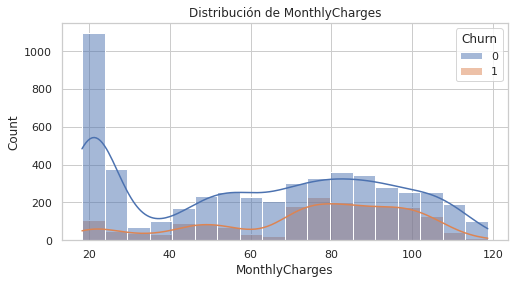

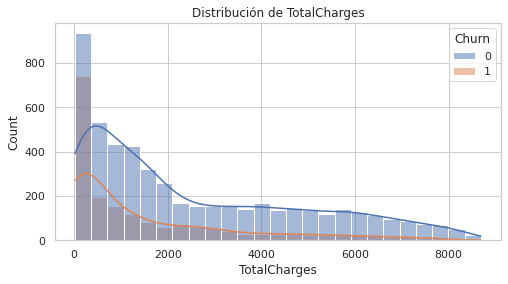

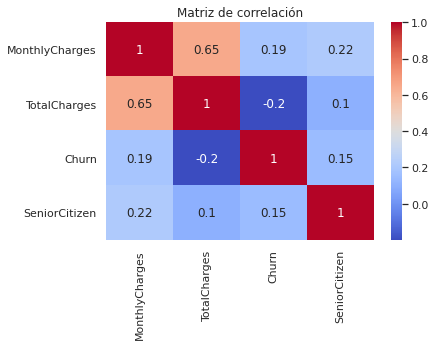

In [ ]:
# Exploración de Variables Numéricas
numeric_features = final_df.select_dtypes(include=['number']).drop(['SeniorCitizen', 'Churn'], axis=1)
print(numeric_features.describe())

# Histogramas para variables numéricas
for col in numeric_features.columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(data=final_df, x=col, hue='Churn', kde=True)
    plt.title(f'Distribución de {col}')
    plt.show()

# Correlación entre variables numéricas y la variable objetivo
correlation_matrix = final_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de correlación')
plt.show()

- Tras analizar las graficas de monthly y total charges podemos concluir que hay una tendencia para la cancelacion de los clientes que pagan mas sobre los que pagan menos mensualmente, esto hablando de la grafica para monthly charges, lo que puede indicar que esto proviene de aquellos que pagan mensualmente.

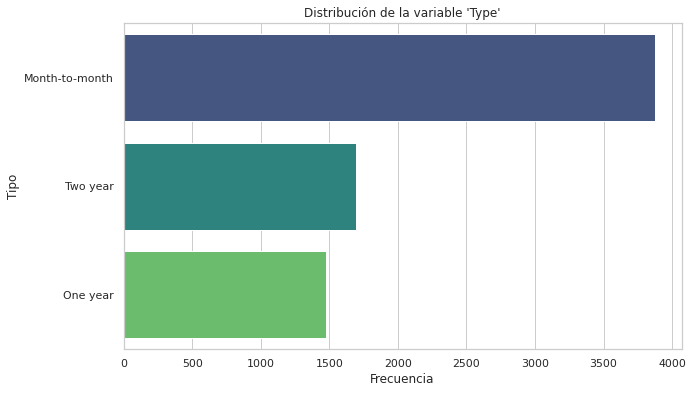

In [ ]:
# Type
sns.set(style="whitegrid")

# Frecuencia de cada categoría
category_counts = final_df['Type'].value_counts()

# Gráfico de barras horizontales
plt.figure(figsize=(10, 6))
sns.barplot(x=category_counts, y=category_counts.index, orient="h", palette="viridis")
plt.xlabel("Frecuencia")
plt.ylabel("Tipo")
plt.title("Distribución de la variable 'Type'")
plt.show()

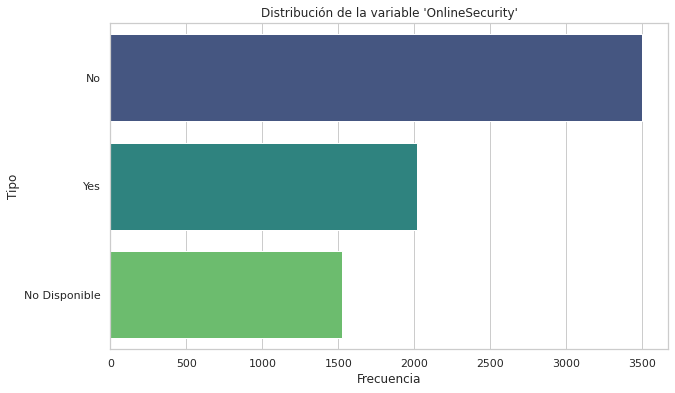

In [ ]:
# OnlineSecurity
sns.set(style="whitegrid")

# Frecuencia de cada categoría
category_counts = final_df['OnlineSecurity'].value_counts()

# Gráfico de barras horizontales
plt.figure(figsize=(10, 6))
sns.barplot(x=category_counts, y=category_counts.index, orient="h", palette="viridis")
plt.xlabel("Frecuencia")
plt.ylabel("Tipo")
plt.title("Distribución de la variable 'OnlineSecurity'")
plt.show()

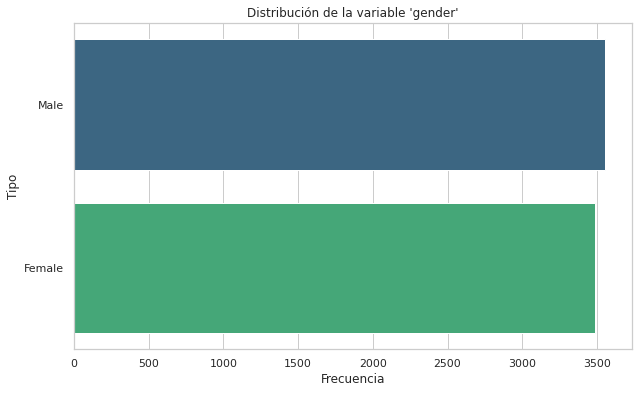

In [ ]:
# gender
sns.set(style="whitegrid")

# Frecuencia de cada categoría
category_counts = final_df['gender'].value_counts()

# Gráfico de barras horizontales
plt.figure(figsize=(10, 6))
sns.barplot(x=category_counts, y=category_counts.index, orient="h", palette="viridis")
plt.xlabel("Frecuencia")
plt.ylabel("Tipo")
plt.title("Distribución de la variable 'gender'")
plt.show()

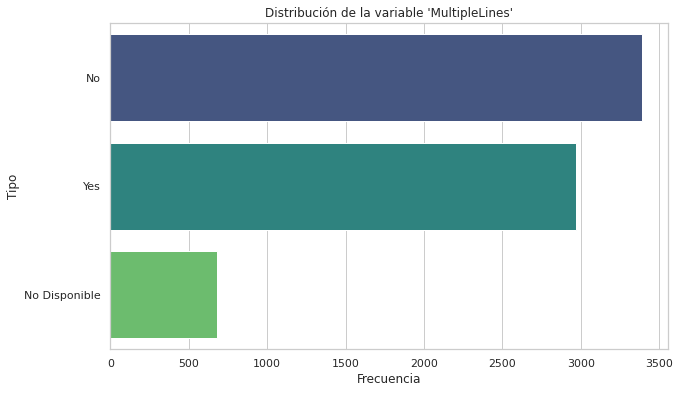

In [ ]:
# MultipleLines
sns.set(style="whitegrid")

# Frecuencia de cada categoría
category_counts = final_df['MultipleLines'].value_counts()

# Gráfico de barras horizontales
plt.figure(figsize=(10, 6))
sns.barplot(x=category_counts, y=category_counts.index, orient="h", palette="viridis")
plt.xlabel("Frecuencia")
plt.ylabel("Tipo")
plt.title("Distribución de la variable 'MultipleLines'")
plt.show()

- La variable gender estudiada no representan una significancia importante contrastada con la variable Churn, no hay un sesgo representativo que pueda indicar una correlacion entre los clientes abandonando la empresa y las variables categoricas estudiadas, sin embargo se deberan de tomar en cuenta para poder realizar una mejor prediccion. Para el resto de variables no se puede saber con certeza si son representativas para la cancelacion de clientes por ende se debera ahondar mas en ellas en las hipotesis y en los modelos.

# Hipotesis
H0 : Los clientes con contratos de corta duración tienen una mayor probabilidad de cancelar sus servicios

H1 : Los clientes con contratos de corta duración NO tienen una mayor probabilidad de cancelar sus servicios

In [ ]:
# Dividir el DataFrame en dos grupos: corta duración y largo plazo
corta_duracion_df = final_df[final_df['Type'] == 'Month-to-month']
largo_plazo_df = final_df[final_df['Type'].isin(['One year', 'Two year'])]

# Crear una tabla de contingencia entre 'Type' (contratos) y 'Churn' (cancelaciones)
contingency_table = pd.crosstab(final_df['Type'], final_df['Churn'])

# Realizar el test de chi-cuadrado
chi2, p, _, _ = chi2_contingency(contingency_table)

# Definir nivel de significancia
alpha = 0.05

# Interpretar los resultados
if p < alpha:
    print("Rechazamos la hipótesis nula. Hay una diferencia significativa en las tasas de cancelación.")
else:
    print("No podemos rechazar la hipótesis nula. No hay evidencia de una diferencia significativa en las tasas de cancelación.")

Rechazamos la hipótesis nula. Hay una diferencia significativa en las tasas de cancelación.


H0 : Los clientes con servicios de seguridad tienen una mayor probabilidad de cancelar sus servicios

H1 : Los clientes con servicios de seguridad NO tienen una mayor probabilidad de cancelar sus servicios

In [ ]:
# Crear una tabla de contingencia entre 'OnlineSecurity' y 'Churn'
contingency_table = pd.crosstab(final_df['OnlineSecurity'], final_df['Churn'])

# Realizar el test de chi-cuadrado
chi2, p, _, _ = chi2_contingency(contingency_table)

# Definir nivel de significancia
alpha = 0.05

# Interpretar los resultados
if p < alpha:
    print("Rechazamos la hipótesis nula. Hay una diferencia significativa en las tasas de cancelación entre los grupos con y sin servicios de seguridad en línea.")
else:
    print("No podemos rechazar la hipótesis nula. No hay evidencia de una diferencia significativa en las tasas de cancelación.")

Rechazamos la hipótesis nula. Hay una diferencia significativa en las tasas de cancelación entre los grupos con y sin servicios de seguridad en línea.


# Modelos

In [ ]:
# Definir características y objetivo
features = final_df.drop(['Churn'], axis=1)
target = final_df['Churn']
features = features.drop(['BeginDate', 'EndDate'], axis=1)

# Codificar características categóricas usando one-hot encoding
features_encoded = pd.get_dummies(features, columns=['Type', 'PaperlessBilling', 'PaymentMethod', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'gender', 'Partner', 'Dependents', 'MultipleLines'])

encoder = LabelEncoder()
features_encoded['customerID'] = encoder.fit_transform(features_encoded['customerID'])

# Dividir los datos en conjuntos de entrenamiento y prueba
features_train, features_test, target_train, target_test = train_test_split(features_encoded, target, test_size=0.2, random_state=42)

In [ ]:
# Contar la cantidad de muestras en cada clase
class_counts = target_train.value_counts()

# Encontrar la clase con menos muestras
minority_class = class_counts.idxmin()

# Calcular cuántas muestras agregar para igualar las clases
num_to_add = class_counts.max() - class_counts[minority_class]

# Filtrar las muestras de la clase minoritaria
minority_samples = features_train[target_train == minority_class]

# Muestrear aleatoriamente las muestras de la clase minoritaria para igualar las clases
indices_to_add = np.random.choice(minority_samples.index, num_to_add)
oversampled_features = pd.concat([features_train, features_train.loc[indices_to_add]])
oversampled_target = pd.concat([target_train, target_train.loc[indices_to_add]])

# Verificar el balance de clases después del sobremuestreo
oversampled_target.value_counts()

0    4138
1    4138
Name: Churn, dtype: int64

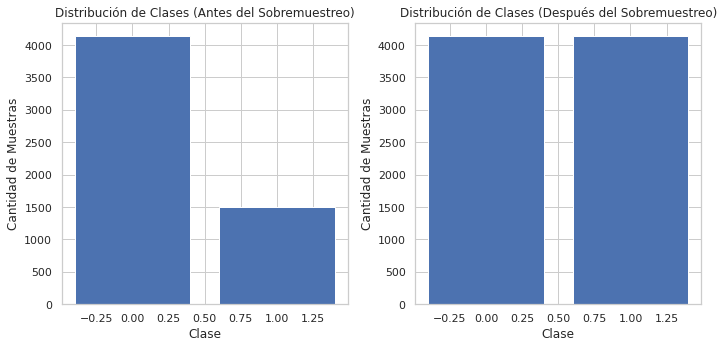

In [ ]:
# Contar la cantidad de muestras en cada clase antes del sobremuestreo
class_counts_before = target_train.value_counts()

# Contar la cantidad de muestras en cada clase después del sobremuestreo
class_counts_after = oversampled_target.value_counts()

# Crear un gráfico de barras comparando las clases antes y después del sobremuestreo
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.bar(class_counts_before.index, class_counts_before.values)
plt.title('Distribución de Clases (Antes del Sobremuestreo)')
plt.xlabel('Clase')
plt.ylabel('Cantidad de Muestras')

plt.subplot(1, 2, 2)
plt.bar(class_counts_after.index, class_counts_after.values)
plt.title('Distribución de Clases (Después del Sobremuestreo)')
plt.xlabel('Clase')
plt.ylabel('Cantidad de Muestras')

plt.tight_layout()
plt.show()

Este gráfico de barras compara la distribución de clases antes y después del sobremuestreo. En el primer gráfico (izquierda), puedes observar cómo estaba desequilibrada la cantidad de muestras entre las dos clases antes del sobremuestreo. Había significativamente menos muestras en la clase minoritaria (Churn = 1) en comparación con la clase mayoritaria (Churn = 0). En el segundo gráfico (derecha), después de aplicar el sobremuestreo, puedes ver cómo ambas clases ahora tienen la misma cantidad de muestras. Esto es esencial para evitar que el modelo esté sesgado hacia la clase mayoritaria y que pueda aprender de manera equitativa de ambas clases, mejorando así su capacidad para predecir con precisión la clase minoritaria.

In [ ]:
# Copia de seguridad del DataFrame original
original_df = final_df.copy()

# Eliminar 'BeginDate' y 'EndDate'
original_df.drop(['BeginDate', 'EndDate'], axis=1, inplace=True)

# Codificar características categóricas usando one-hot encoding
features_encoded = pd.get_dummies(original_df, columns=['Type', 'PaperlessBilling', 'PaymentMethod', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'gender', 'Partner', 'Dependents', 'MultipleLines'])

# Utilizar Label Encoding para 'customerID'
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
features_encoded['customerID'] = encoder.fit_transform(features_encoded['customerID'])

In [ ]:
# Dividir los datos en las clases mayoritaria (Churn=0) y minoritaria (Churn=1)
majority_class = features_encoded[features_encoded['Churn'] == 0]
minority_class = features_encoded[features_encoded['Churn'] == 1]

# Sobremuestrear la clase minoritaria para igualar el número de muestras con la clase mayoritaria
minority_class_resampled = resample(minority_class, replace=True, n_samples=len(majority_class), random_state=42)

# Combinar las clases sobremuestreadas con la clase mayoritaria
final_df_resampled = pd.concat([majority_class, minority_class_resampled])

# Dividir los datos en características (features) y objetivo (target)
features_resampled = final_df_resampled.drop(['Churn'], axis=1)
target_resampled = final_df_resampled['Churn']

# Dividir los datos en conjuntos de entrenamiento y prueba
features_train_resampled, features_test, target_train_resampled, target_test = train_test_split(features_resampled, target_resampled, test_size=0.2, random_state=42)

## Random Forest

In [ ]:
# Definir los hiperparámetros que deseas ajustar
param_grid = {
    'n_estimators': [10, 50, 100],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Crear un objeto GridSearchCV
grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42),
                           param_grid=param_grid,
                           scoring='accuracy',
                           cv=5,
                           n_jobs=-1)

# Realizar la búsqueda en cuadrícula en los datos de entrenamiento
grid_search.fit(features_train_resampled, target_train_resampled)

# Mostrar los mejores hiperparámetros encontrados
best_params = grid_search.best_params_
print(f'Los mejores hiperparámetros encontrados: {best_params}')

# Obtener el mejor modelo
best_rf_model = grid_search.best_estimator_

# Realizar predicciones en el conjunto de prueba con el mejor modelo
target_pred_best_rf = best_rf_model.predict(features_test)

# Calcular las métricas con el mejor modelo
accuracy_best_rf = accuracy_score(target_test, target_pred_best_rf)
print(f'Precisión del mejor modelo Random Forest: {accuracy_best_rf:.2f}')

rf_auc_roc_best = roc_auc_score(target_test, target_pred_best_rf)
print(f'AUC-ROC para el mejor modelo Random Forest: {rf_auc_roc_best:.2f}')

rf_f1_best = f1_score(target_test, target_pred_best_rf)
print(f'F1 Score para el mejor modelo Random Forest: {rf_f1_best:.2f}')

Los mejores hiperparámetros encontrados: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Precisión del mejor modelo Random Forest: 0.91
AUC-ROC para el mejor modelo Random Forest: 0.91
F1 Score para el mejor modelo Random Forest: 0.92


## Decision Tree

In [ ]:
# Crear y entrenar un modelo Decision Tree Classifier
dtc_model = DecisionTreeClassifier(random_state=42)
dtc_model.fit(features_train_resampled, target_train_resampled)

# Realizar predicciones en el conjunto de prueba
dtc_predictions = dtc_model.predict(features_test)

# Calcular la precisión del modelo
accuracy_dtc = accuracy_score(target_test, dtc_predictions)
print(f'Accuracy: {accuracy_dtc:.2f}')

# Calcular AUC-ROC
dtc_auc_roc = roc_auc_score(target_test, dtc_predictions)
print(f'AUC-ROC para Decision Tree Classifier: {dtc_auc_roc:.2f}')

# Calcular F1 Score
dtc_f1 = f1_score(target_test, dtc_predictions)
print(f'F1 Score para Decision Tree: {dtc_f1:.2f}')

Accuracy: 0.87
AUC-ROC para Decision Tree Classifier: 0.87
F1 Score para Decision Tree: 0.88


## Logistic Regression

In [ ]:
# Crear y entrenar un modelo de Regresión Logística
logistic_model = LogisticRegression(random_state=42)
logistic_model.fit(features_train_resampled, target_train_resampled)

# Realizar predicciones en el conjunto de prueba
logistic_predictions = logistic_model.predict(features_test)

# Calcular la precisión del modelo
accuracy_lr = accuracy_score(target_test, logistic_predictions)
print(f'Precisión del modelo Linear Regression: {accuracy_lr:.2f}')

# Calcular AUC-ROC
logistic_auc_roc = roc_auc_score(target_test, logistic_predictions)
print(f'AUC-ROC para Linear Regression: {logistic_auc_roc:.2f}')

# Calcular F1 Score
lm_f1 = f1_score(target_test, logistic_predictions)
print(f'F1 Score para Linear Regression: {lm_f1:.2f}')

Precisión del modelo Linear Regression: 0.76
AUC-ROC para Linear Regression: 0.76
F1 Score para Linear Regression: 0.77


## Gradient Boosting

In [ ]:
# Crear y entrenar un modelo Gradient Boosting
param_grid_gb = {
    'n_estimators': [10, 50, 100],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2]
}

grid_gb = GridSearchCV(
    GradientBoostingClassifier(random_state=42),
    param_grid=param_grid_gb,
    cv=5
)

grid_gb.fit(features_train_resampled, target_train_resampled)

# Obtener el mejor modelo con los hiperparámetros ajustados
best_gb_model = grid_gb.best_estimator_

# Realizar predicciones en el conjunto de prueba
gb_predictions = best_gb_model.predict(features_test)

# Calcular la precisión del modelo
accuracy_gb = accuracy_score(target_test, gb_predictions)
print(f'Precisión del modelo Gradient Boosting: {accuracy_gb:.2f}')

# Calcular AUC-ROC para el modelo Gradient Boosting
gb_auc_roc = roc_auc_score(target_test, gb_predictions)
print(f'AUC-ROC para Gradient Boosting: {gb_auc_roc:.2f}')

# Calcular F1 Score
gb_f1 = f1_score(target_test, gb_predictions)
print(f'F1 Score para Gradient Boosting: {gb_f1:.2f}')

Precisión del modelo Gradient Boosting: 0.90
AUC-ROC para Gradient Boosting: 0.90
F1 Score para Gradient Boosting: 0.90


## XGBoost

In [ ]:
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=DataConversionWarning)

# Crear y entrenar un modelo XGBoost con ajuste de hiperparámetros
param_grid_xgb = {
    'n_estimators': [10, 50, 100],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2]
}

grid_xgb = GridSearchCV(
    xgb.XGBClassifier(random_state=42, use_label_encoder=False),
    param_grid=param_grid_xgb,
    cv=5
)

grid_xgb.fit(features_train_resampled, target_train_resampled)

# Obtener el mejor modelo con los hiperparámetros ajustados
best_xgb_model = grid_xgb.best_estimator_

# Realizar predicciones en el conjunto de prueba
xgb_predictions = best_xgb_model.predict(features_test)

# Calcular la precisión del modelo
accuracy_xgb = accuracy_score(target_test, xgb_predictions)
print(f'Precisión del modelo XGBoost: {accuracy_xgb:.2f}')

# Calcular AUC-ROC para el modelo XGBoost
xgb_auc_roc = roc_auc_score(target_test, xgb_predictions)
print(f'AUC-ROC para XGBoost: {xgb_auc_roc:.2f}')

# Calcular F1 Score
xgb_f1 = f1_score(target_test, xgb_predictions)
print(f'F1 Score para XGBoost: {xgb_f1:.2f}')

[17:41:20] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:41:22] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:41:25] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:41:27] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

## K-Nearest Neighbors

In [ ]:
# Crear y entrenar un modelo K-Nearest Neighbors
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(features_train_resampled, target_train_resampled)

# Realizar predicciones en el conjunto de prueba
knn_predictions = knn_model.predict(features_test)

# Calcular la precisión del modelo
accuracy_knn = accuracy_score(target_test, knn_predictions)
print(f"Precisión del modelo KNN: {accuracy_knn:.2f}")

# También puedes calcular el AUC-ROC
knn_auc_roc = roc_auc_score(target_test, knn_model.predict_proba(features_test)[:, 1])
print(f"AUC-ROC del modelo KNN: {knn_auc_roc:.2f}")

# Calcular F1 Score
knn_f1 = f1_score(target_test, knn_predictions)
print(f'F1 Score para KNN: {knn_f1:.2f}')

Precisión del modelo KNN: 0.72
AUC-ROC del modelo KNN: 0.80
F1 Score para KNN: 0.74


# Conclusiones de los modelos

Después de entrenar y evaluar seis modelos de machine learning en nuestro conjunto de datos, los resultados se resumen de la siguiente manera:

- Random Forest lidera en términos de precisión con un valor del 91%, y también logra un alto AUC-ROC de 91% y un impresionante F1 Score de 92%.

- Decision Tree, Gradient Boosting y XGBoost también muestran un sólido rendimiento, con valores cercanos al 90% en precisión, AUC-ROC y F1 Score.

- Linear Regression, aunque aún ofrece resultados decentes con una precisión del 76% y un AUC-ROC del 76%, muestra un F1 Score ligeramente menor de 77%.

- El modelo K-Nearest Neighbors (KNN) obtiene una precisión del 72%, un AUC-ROC del 80% y un F1 Score del 74%, siendo el rendimiento más bajo entre los modelos evaluados.

Estos resultados sugieren que Random Forest es el modelo preferido debido a su alta precisión y equilibrio en las métricas de clasificación.